In [1]:
import pynbody
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gyr = 3.15576e16 # in s
solar_mass_g = 1.989e33
G = 6.674e-8 # cm3 g-1 s-2
kpc = 3.09e21 # cm

In [3]:
s = pynbody.load('isolated_run/snapshot_117.hdf5')

/home/pdcg/anaconda3/lib/python3.9/site-packages/pynbody/snapshot/gadgethdf.py:370: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


In [4]:
s.physical_units()

In [5]:
s['eps'] = s['smooth'].min()

In [6]:
s['pos'] -= s.properties['boxsize']/2

In [7]:
pg = pynbody.analysis.profile.Profile(s.g, rmin=0, rmax=30, nbins=100)

Text(0, 0.5, 'Pressure [$M_\\odot \\rm{km}^2\\, \\rm{s}^{-2}\\, \\rm{kpc}^{-3}$]')

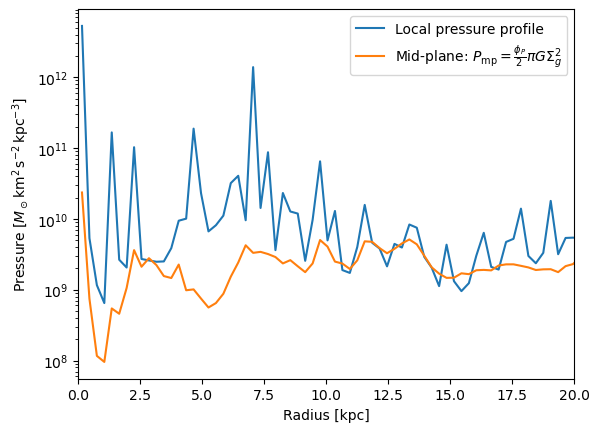

In [8]:
plt.plot(pg['rbins'], pg['Pressure'], label="Local pressure profile")
plt.plot(pg['rbins'], pg['density']**2 * np.pi * G * 3/2 * solar_mass_g / kpc * 1e-10, label=r"Mid-plane: $P_{\rm{mp}} = \frac{\phi_P}{2} \pi G \Sigma_g^2$")
plt.semilogy()
plt.legend()
plt.xlim(0,20)
plt.xlabel("Radius [kpc]")
plt.ylabel(r"Pressure [$M_\odot \rm{km}^2\, \rm{s}^{-2}\, \rm{kpc}^{-3}$]")

SimArray([[1180964.  , 1160266.5 , 1139569.2 , ..., 4838312.5 ,
           4859963.  , 4881614.  ],
          [1177828.  , 1154360.8 , 1130893.8 , ..., 4868338.  ,
           4828837.5 , 4789337.  ],
          [1174691.9 , 1148455.1 , 1122218.2 , ..., 4898364.  ,
           4797712.  , 4697060.5 ],
          ...,
          [3141173.2 , 3127667.8 , 3114162.5 , ...,  949122.5 ,
            947201.44,  945280.2 ],
          [3159222.8 , 3147561.  , 3135899.5 , ...,  894557.94,
            895449.4 ,  896340.9 ],
          [3177272.2 , 3167454.5 , 3157636.8 , ...,  839993.3 ,
            843697.4 ,  847401.25]], dtype=float32, 'Msol kpc**-2')

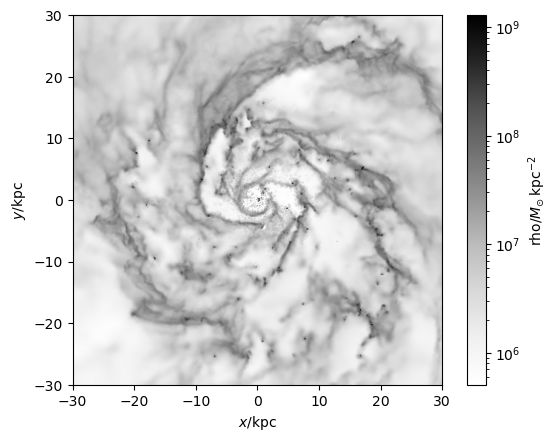

In [19]:
pynbody.plot.sph.image(s.g, qty="rho", units='Msol kpc^-2', width=60, cmap="Greys")